In [21]:
1+1

2

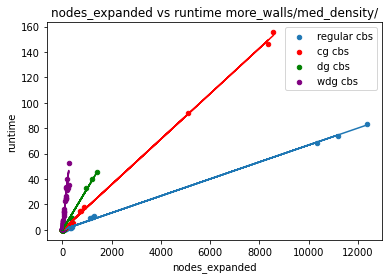

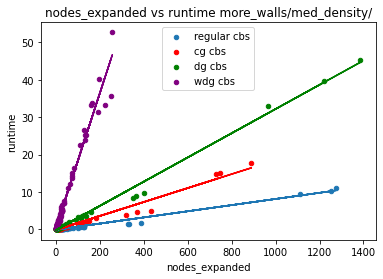

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# folder = 'more_walls/low_density/'
folder = 'more_walls/med_density/'
# folder = 'more_walls/high_density/'

# folder = 'more_agents/low_density/'
# folder = 'more_agents/med_density/'
# folder = 'more_agents/high_density/'

dataframe = pd.read_csv(folder+'data_reg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df = dataframe[['nodes_expanded', 'runtime', 'density']]

dataframe2 = pd.read_csv(folder+'data_cg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df2 = dataframe2[['nodes_expanded', 'runtime', 'density']]

dataframe3 = pd.read_csv(folder+'data_dg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df3 = dataframe3[['nodes_expanded', 'runtime', 'density']]

dataframe4 = pd.read_csv(folder+'data_wdg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df4 = dataframe4[['nodes_expanded', 'runtime', 'density']]


m, b = np.polyfit(df['nodes_expanded'], df['runtime'], 1)
m2, b2 = np.polyfit(df2['nodes_expanded'], df2['runtime'], 1)
m3, b3 = np.polyfit(df3['nodes_expanded'], df3['runtime'], 1)
m4, b4 = np.polyfit(df4['nodes_expanded'], df4['runtime'], 1)

ax = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='nodes_expanded', y="runtime", ax=ax)
plt.plot(df['nodes_expanded'], m*df['nodes_expanded'] + b)
df2.plot(kind='scatter', label='cg cbs', x='nodes_expanded', y="runtime", color='red', ax=ax)
plt.plot(df2['nodes_expanded'], m2*df2['nodes_expanded'] + b2, color='red')
df3.plot(kind='scatter', label='dg cbs', x='nodes_expanded', y="runtime", color='green', ax=ax)
plt.plot(df3['nodes_expanded'], m3*df3['nodes_expanded'] + b3, color="green")
df4.plot(kind='scatter', label='wdg cbs', x='nodes_expanded', y="runtime", color='purple', ax=ax)
plt.plot(df4['nodes_expanded'], m4*df4['nodes_expanded'] + b4, color='purple')
ax.set_title('nodes_expanded vs runtime ' + folder)
plt.show()


df = df[df.nodes_expanded<2000]
df2 = df2[df2.nodes_expanded<2000]
df3 = df3[df3.nodes_expanded<2000]
df4 = df4[df4.nodes_expanded<2000]

m, b = np.polyfit(df['nodes_expanded'], df['runtime'], 1)
m2, b2 = np.polyfit(df2['nodes_expanded'], df2['runtime'], 1)
m3, b3 = np.polyfit(df3['nodes_expanded'], df3['runtime'], 1)
m4, b4 = np.polyfit(df4['nodes_expanded'], df4['runtime'], 1)

ax2 = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='nodes_expanded', y="runtime", ax=ax2)
plt.plot(df['nodes_expanded'], m*df['nodes_expanded'] + b)
df2.plot(kind='scatter', label='cg cbs', x='nodes_expanded', y="runtime", color='red', ax=ax2)
plt.plot(df2['nodes_expanded'], m2*df2['nodes_expanded'] + b2, color='red')
df3.plot(kind='scatter', label='dg cbs', x='nodes_expanded', y="runtime", color='green', ax=ax2)
plt.plot(df3['nodes_expanded'], m3*df3['nodes_expanded'] + b3, color="green")
df4.plot(kind='scatter', label='wdg cbs', x='nodes_expanded', y="runtime", color='purple', ax=ax2)
plt.plot(df4['nodes_expanded'], m4*df4['nodes_expanded'] + b4, color='purple')
ax2.set_title('nodes_expanded vs runtime ' + folder)
plt.show()



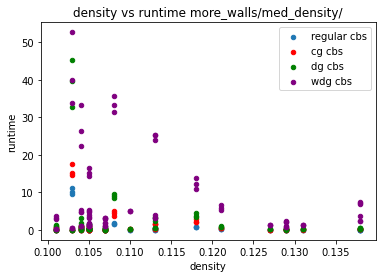

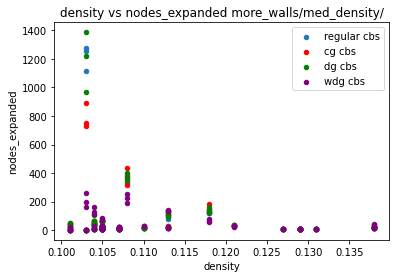

In [23]:
# plot the agent-density of instance vs runtime of solution
ax = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='density', y="runtime", ax=ax)
df2.plot(kind='scatter', label='cg cbs', x='density', y="runtime", color='red', ax=ax)
df3.plot(kind='scatter', label='dg cbs', x='density', y="runtime", color='green', ax=ax)
df4.plot(kind='scatter', label='wdg cbs', x='density', y="runtime", color='purple', ax=ax)
ax.set_title('density vs runtime ' + folder)
plt.show()
# plot the agent-density of instance vs expanded nodes of solution
ax2 = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='density', y="nodes_expanded", ax=ax2)
df2.plot(kind='scatter', label='cg cbs', x='density', y="nodes_expanded", color='red', ax=ax2)
df3.plot(kind='scatter', label='dg cbs', x='density', y="nodes_expanded", color='green', ax=ax2)
df4.plot(kind='scatter', label='wdg cbs', x='density', y="nodes_expanded", color='purple', ax=ax2)
ax2.set_title('density vs nodes_expanded ' + folder)
plt.show()

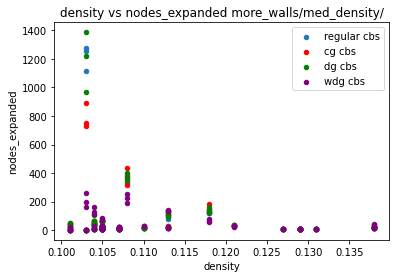

In [24]:
ax2 = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='density', y="nodes_expanded", ax=ax2)
df2.plot(kind='scatter', label='cg cbs', x='density', y="nodes_expanded", color='red', ax=ax2)
df3.plot(kind='scatter', label='dg cbs', x='density', y="nodes_expanded", color='green', ax=ax2)
df4.plot(kind='scatter', label='wdg cbs', x='density', y="nodes_expanded", color='purple', ax=ax2)
ax2.set_title('density vs nodes_expanded ' + folder)
plt.show()

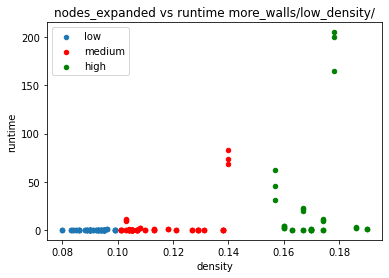

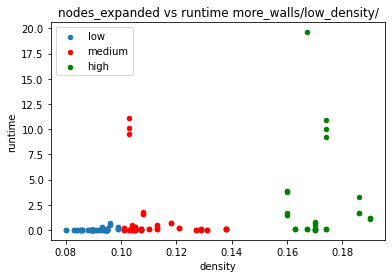

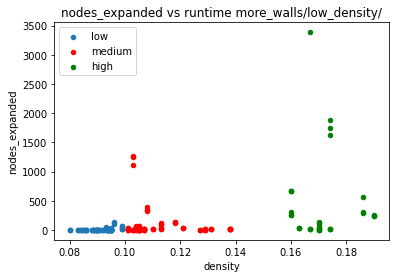

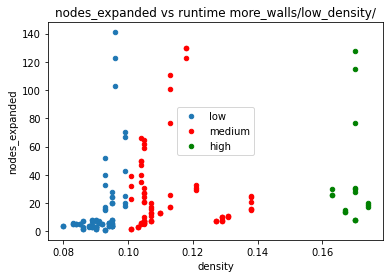

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

folder = 'more_walls/low_density/'
folder2 = 'more_walls/med_density/'
folder3 = 'more_walls/high_density/'

dataframe = pd.read_csv(folder+'data_reg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df = dataframe[['nodes_expanded', 'runtime', 'density']]

dataframe2 = pd.read_csv(folder2+'data_reg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df2 = dataframe2[['nodes_expanded', 'runtime', 'density']]

dataframe3 = pd.read_csv(folder3+'data_reg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df3 = dataframe3[['nodes_expanded', 'runtime', 'density']]

# ---------- plotting wall density vs time ----------------------
ax = plt.gca()
df.plot(kind='scatter', label='low', x='density', y="runtime", ax=ax)
# plt.plot(df['nodes_expanded'], m*df['nodes_expanded'] + b)
df2.plot(kind='scatter', label='medium', x='density', y="runtime", color='red', ax=ax)
# plt.plot(df2['nodes_expanded'], m2*df2['nodes_expanded'] + b2, color='red')
df3.plot(kind='scatter', label='high', x='density', y="runtime", color='green', ax=ax)
# plt.plot(df3['nodes_expanded'], m3*df3['nodes_expanded'] + b3, color="green")
ax.set_title('nodes_expanded vs runtime ' + folder)
plt.show()

df = df[df.runtime<100]
df2 = df2[df2.runtime<20]
df3 = df3[df3.runtime<20]
df4 = df4[df4.runtime<20]

ax = plt.gca()
df.plot(kind='scatter', label='low', x='density', y="runtime", ax=ax)
# plt.plot(df['nodes_expanded'], m*df['nodes_expanded'] + b)
df2.plot(kind='scatter', label='medium', x='density', y="runtime", color='red', ax=ax)
# plt.plot(df2['nodes_expanded'], m2*df2['nodes_expanded'] + b2, color='red')
df3.plot(kind='scatter', label='high', x='density', y="runtime", color='green', ax=ax)
# plt.plot(df3['nodes_expanded'], m3*df3['nodes_expanded'] + b3, color="green")
ax.set_title('nodes_expanded vs runtime ' + folder)
plt.show()

# ---------- plotting density vs expanded ----------------------
ax = plt.gca()
df.plot(kind='scatter', label='low', x='density', y="nodes_expanded", ax=ax)
# plt.plot(df['nodes_expanded'], m*df['nodes_expanded'] + b)
df2.plot(kind='scatter', label='medium', x='density', y="nodes_expanded", color='red', ax=ax)
# plt.plot(df2['nodes_expanded'], m2*df2['nodes_expanded'] + b2, color='red')
df3.plot(kind='scatter', label='high', x='density', y="nodes_expanded", color='green', ax=ax)
# plt.plot(df3['nodes_expanded'], m3*df3['nodes_expanded'] + b3, color="green")
ax.set_title('nodes_expanded vs runtime ' + folder)
plt.show()

df = df[df.nodes_expanded<200]
df2 = df2[df2.nodes_expanded<200]
df3 = df3[df3.nodes_expanded<200]
df4 = df4[df4.nodes_expanded<200]

ax = plt.gca()
df.plot(kind='scatter', label='low', x='density', y="nodes_expanded", ax=ax)
# plt.plot(df['nodes_expanded'], m*df['nodes_expanded'] + b)
df2.plot(kind='scatter', label='medium', x='density', y="nodes_expanded", color='red', ax=ax)
# plt.plot(df2['nodes_expanded'], m2*df2['nodes_expanded'] + b2, color='red')
df3.plot(kind='scatter', label='high', x='density', y="nodes_expanded", color='green', ax=ax)
# plt.plot(df3['nodes_expanded'], m3*df3['nodes_expanded'] + b3, color="green")
ax.set_title('nodes_expanded vs runtime ' + folder)
plt.show()
